## Hyper-parameter tuning

- In case of KMeans clustering, use the elbow method to find the sweet spot of value of clusters
- plotl the silhouette score for different cluster values

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.metrics import silhouette_score

#We can't use GridSearch in case of clustering because grid search uses cross validation to tune the 
#parameter. But in case of clustering algorithm, cross validation does not make sense.
from sklearn.model_selection import ParameterGrid

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

In [6]:
drivers_df = pd.read_csv("datasets/driver_details.csv")
drivers_df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [8]:
drivers_df.shape

(4000, 3)

In [11]:
drivers_df[drivers_df.isnull().any(axis=1)]

,Driver_ID,Distance_Feature,Speeding_Feature


In [12]:
drivers_df.describe()

,Driver_ID,Distance_Feature,Speeding_Feature
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [13]:
drivers_feature = drivers_df.drop('Driver_ID',axis=1)

In [16]:
parameters = {'n_clusters':[2,3,5,6,7,8,10,20,30]}
parameter_grid = ParameterGrid(parameters)

Here, we will try to find the Silhouette score of every parameter to find the best cluster number. The reason for choosing silhouette score is because we do not have the labelled data

In [18]:
list(parameter_grid)

[{'n_clusters': 2},
 {'n_clusters': 3},
 {'n_clusters': 5},
 {'n_clusters': 6},
 {'n_clusters': 7},
 {'n_clusters': 8},
 {'n_clusters': 10},
 {'n_clusters': 20},
 {'n_clusters': 30}]

In [19]:
best_score = -1
model = KMeans()

In [23]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_feature)
    
    ss = metrics.silhouette_score(drivers_feature,model.labels_)
    print("Parameter: ", g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_param = g

Parameter:  {'n_clusters': 2} Score:  0.8490223286225532
Parameter:  {'n_clusters': 3} Score:  0.8231396834167266
Parameter:  {'n_clusters': 5} Score:  0.5125035310570826
Parameter:  {'n_clusters': 6} Score:  0.48561104817990663
Parameter:  {'n_clusters': 7} Score:  0.4604695933915756
Parameter:  {'n_clusters': 8} Score:  0.4504330858464738
Parameter:  {'n_clusters': 10} Score:  0.436061731194893
Parameter:  {'n_clusters': 20} Score:  0.3719050711373027
Parameter:  {'n_clusters': 30} Score:  0.3411112962981877


It seems that when cluster number = 2, it has the best silhouette score.

In [24]:
best_param

{'n_clusters': 2}

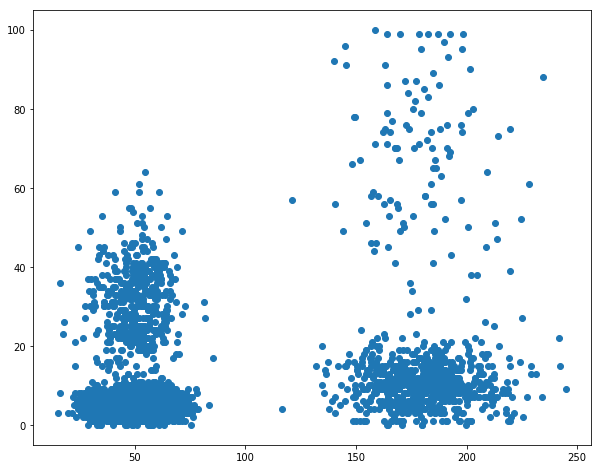

In [25]:
fig,ax = plt.subplots(figsize=(10,8))
plt.scatter(drivers_feature['Distance_Feature'],drivers_feature['Speeding_Feature'])

It is clearn that there seems to be two distince clusters

## Hyper parameter tuning for DBScan

In [33]:
parameters = {'eps': [0.9,1.0,5.0,10.0,12,14,20],
             'min_samples':[5,7,10,12]}

parameter_grid = ParameterGrid(parameters)
list(parameter_grid)

[{'eps': 0.9, 'min_samples': 5},
 {'eps': 0.9, 'min_samples': 7},
 {'eps': 0.9, 'min_samples': 10},
 {'eps': 0.9, 'min_samples': 12},
 {'eps': 1.0, 'min_samples': 5},
 {'eps': 1.0, 'min_samples': 7},
 {'eps': 1.0, 'min_samples': 10},
 {'eps': 1.0, 'min_samples': 12},
 {'eps': 5.0, 'min_samples': 5},
 {'eps': 5.0, 'min_samples': 7},
 {'eps': 5.0, 'min_samples': 10},
 {'eps': 5.0, 'min_samples': 12},
 {'eps': 10.0, 'min_samples': 5},
 {'eps': 10.0, 'min_samples': 7},
 {'eps': 10.0, 'min_samples': 10},
 {'eps': 10.0, 'min_samples': 12},
 {'eps': 12, 'min_samples': 5},
 {'eps': 12, 'min_samples': 7},
 {'eps': 12, 'min_samples': 10},
 {'eps': 12, 'min_samples': 12},
 {'eps': 14, 'min_samples': 5},
 {'eps': 14, 'min_samples': 7},
 {'eps': 14, 'min_samples': 10},
 {'eps': 14, 'min_samples': 12},
 {'eps': 20, 'min_samples': 5},
 {'eps': 20, 'min_samples': 7},
 {'eps': 20, 'min_samples': 10},
 {'eps': 20, 'min_samples': 12}]

In [34]:
model = DBSCAN()
best_score = -1

In [35]:
for g in parameter_grid:
    model.set_params(**g)
    model.fit(drivers_feature)
    
    ss = metrics.silhouette_score(drivers_feature,model.labels_)
    print("Parameter: ", g, 'Score: ', ss)
    if ss > best_score:
        best_score = ss
        best_param = g

Parameter:  {'eps': 0.9, 'min_samples': 5} Score:  -0.6057173612292268
Parameter:  {'eps': 0.9, 'min_samples': 7} Score:  -0.4265046999507063
Parameter:  {'eps': 0.9, 'min_samples': 10} Score:  -0.39254168253371013
Parameter:  {'eps': 0.9, 'min_samples': 12} Score:  -0.4286838741223884
Parameter:  {'eps': 1.0, 'min_samples': 5} Score:  -0.6155746493060738
Parameter:  {'eps': 1.0, 'min_samples': 7} Score:  -0.41637001640330673
Parameter:  {'eps': 1.0, 'min_samples': 10} Score:  -0.3837814631696031
Parameter:  {'eps': 1.0, 'min_samples': 12} Score:  -0.38648235283744914
Parameter:  {'eps': 5.0, 'min_samples': 5} Score:  0.31011275260225
Parameter:  {'eps': 5.0, 'min_samples': 7} Score:  0.7820011223700856
Parameter:  {'eps': 5.0, 'min_samples': 10} Score:  0.7974222681120255
Parameter:  {'eps': 5.0, 'min_samples': 12} Score:  0.7914367881923341
Parameter:  {'eps': 10.0, 'min_samples': 5} Score:  0.7598056658175874
Parameter:  {'eps': 10.0, 'min_samples': 7} Score:  0.8157570071704705
Par

In [36]:
best_param

{'eps': 20, 'min_samples': 5}

In [37]:
model.set_params(**best_param)
model.fit(drivers_feature)

DBSCAN(algorithm='auto', eps=20, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

In [38]:
model.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [43]:
n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)

In [44]:
n_clusters

2

Our hyper parameter tuning pointed out that 2 is the best number of clusters in out dataset

In [47]:
n_noise = list(model.labels_).count(-1)
n_noise

0

As we can see, selecting these parameter values did not give any noise